<a href="https://colab.research.google.com/github/goyalpramod/pytorch_excercises/blob/main/Understanding_DL/Chap02/2_1_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 2.1 Supervised Learning

The purpose of this notebook is to explore the linear regression model discussed in Chapter 2 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and write code to complete the functions. There are also questions interspersed in the text.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
# Math library
import numpy as np
# Plotting library
import matplotlib.pyplot as plt

In [2]:
# Create some input / output data
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

print(x)
print(y)

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]


In [3]:
# Define 1D linear regression model
def f(x, phi0, phi1):
  # TODO :  Replace this line with the linear regression model (eq 2.4)
  y = x*phi1 + phi0

  return y

In [4]:
# Function to help plot the data
def plot(x, y, phi0, phi1):
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    plt.xlim([0,2.0])
    plt.ylim([0,2.0])
    ax.set_xlabel('Input, $x$')
    ax.set_ylabel('Output, $y$')
    # Draw line
    x_line = np.arange(0,2,0.01)
    y_line = f(x_line, phi0, phi1)
    plt.plot(x_line, y_line,'b-',lw=2)

    plt.show()

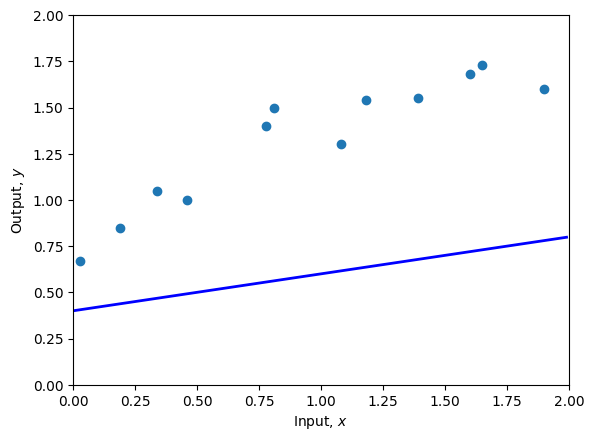

In [5]:
# Set the intercept and slope as in figure 2.2b
phi0 = 0.4 ; phi1 = 0.2
# Plot the data and the model
plot(x,y,phi0,phi1)

In [8]:
# Function to calculate the loss
def compute_loss(x,y,phi0,phi1):

  # TODO Replace this line with the loss calculation (equation 2.5)[DONE]
  loss = 0
  for i in range(len(y)):
    loss += (f(x[i],phi0,phi1) - y[i])**2

  return loss

In [9]:
# Compute the loss for our current model
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =7.07')

Your Loss = 7.07, Ground truth =7.07


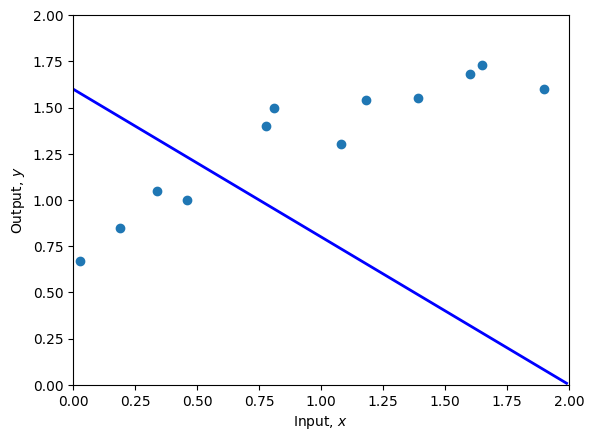

Your Loss = 10.28, Ground truth =10.28


In [10]:
# Set the intercept and slope as in figure 2.2c
phi0 = 1.60 ; phi1 =-0.8
# Plot the data and the model
plot(x,y,phi0,phi1)
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =10.28')

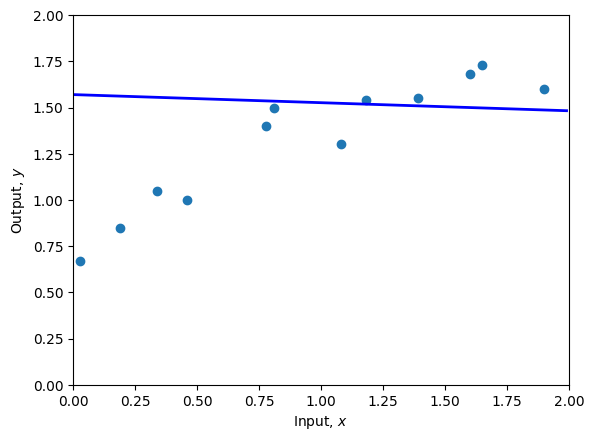

Your Loss = 2.04


In [21]:
# TODO -- Change the parameters manually to fit the model
# First fix phi1 and try changing phi0 until you can't make the loss go down any more
# Then fix phi0 and try changing phi1 until you can't make the loss go down any more
# Repeat this process until you find a set of parameters that fit the model as in figure 2.2d
# You can either do this by hand, or if you want to get fancy, write code to descent automatically in this way
# Start at these values:
phi0 = 1.60 ; phi1 =-0.8

# My code
for i in range(10):
  loss = compute_loss(x,y,phi0,phi1)
  phi1 += 0.01*loss

# Claude code
# First phase: optimize phi0 while keeping phi1 fixed
for i in range(100):
    current_loss = compute_loss(x, y, phi0, phi1)
    # Try a small increase in phi0
    loss_up = compute_loss(x, y, phi0 + 0.01, phi1)
    # Try a small decrease in phi0
    loss_down = compute_loss(x, y, phi0 - 0.01, phi1)

    if loss_up < current_loss and loss_up <= loss_down:
        phi0 += 0.01  # Move up if it reduces loss
    elif loss_down < current_loss:
        phi0 -= 0.01  # Move down if it reduces loss
    else:
        break  # Stop if no improvement

# Second phase: optimize phi1 while keeping phi0 fixed
for i in range(100):
    current_loss = compute_loss(x, y, phi0, phi1)
    # Try a small increase in phi1
    loss_up = compute_loss(x, y, phi0, phi1 + 0.01)
    # Try a small decrease in phi1
    loss_down = compute_loss(x, y, phi0, phi1 - 0.01)

    if loss_up < current_loss and loss_up <= loss_down:
        phi1 += 0.01  # Move up if it reduces loss
    elif loss_down < current_loss:
        phi1 -= 0.01  # Move down if it reduces loss
    else:
        break  # Stop if no improvement

plot(x,y,phi0,phi1)
print(f'Your Loss = {compute_loss(x,y,phi0,phi1):3.2f}')

# Visualizing the loss function

The above process is equivalent to descending coordinate wise on the loss function<br>

Now let's plot that function

In [22]:
# Make a 2D grid of possible phi0 and phi1 values
phi0_mesh, phi1_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.02))

# Make a 2D array for the losses
all_losses = np.zeros_like(phi1_mesh)
# Run through each 2D combination of phi0, phi1 and compute loss
for indices,temp in np.ndenumerate(phi1_mesh):
    all_losses[indices] = compute_loss(x,y, phi0_mesh[indices], phi1_mesh[indices])


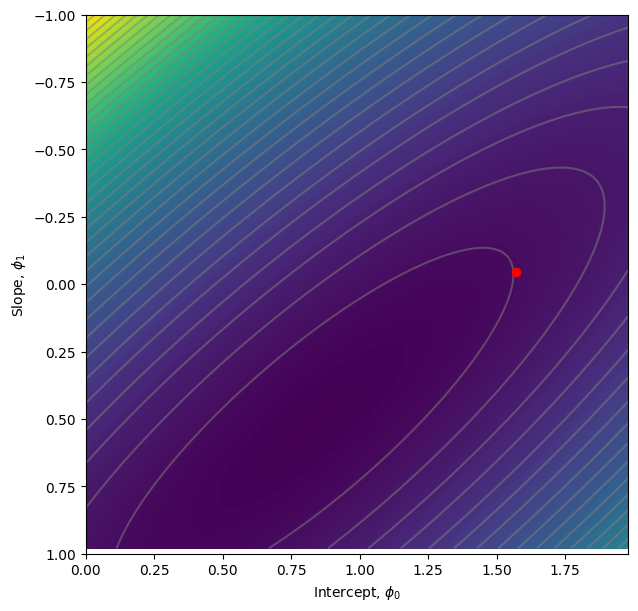

In [23]:
# Plot the loss function as a heatmap
fig = plt.figure()
ax = plt.axes()
fig.set_size_inches(7,7)
levels = 256
ax.contourf(phi0_mesh, phi1_mesh, all_losses ,levels)
levels = 40
ax.contour(phi0_mesh, phi1_mesh, all_losses ,levels, colors=['#80808080'])
ax.set_ylim([1,-1])
ax.set_xlabel(r'Intercept, $\phi_0$')
ax.set_ylabel(r'Slope, $\phi_1$')

# Plot the position of your best fitting line on the loss function
# It should be close to the minimum
ax.plot(phi0,phi1,'ro')
plt.show()

### Problem 2.1 To walk “downhill” on the loss function (equation 2.5), we measure its gradient with respect to the parameters ϕ0 and ϕ1. Calculate expressions for the slopes ∂L/∂ϕ0 and ∂L/∂ϕ1.

I'll calculate the partial derivatives of the loss function with respect to the parameters φ₀ and φ₁.

First, I need to identify the loss function in equation 2.5, which I'll assume is the mean squared error:

$$L(\phi_0, \phi_1) = \frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y}_i)^2$$

Where:
- $y_i$ is the actual target value
- $\hat{y}_i$ is the predicted value for input $x_i$

For a linear model, the prediction is:
$$\hat{y}_i = \phi_0 + \phi_1 x_i$$

Now, I'll calculate the partial derivatives:

1. The partial derivative with respect to φ₀:

$$\frac{\partial L}{\partial \phi_0} = \frac{\partial}{\partial \phi_0}\left[\frac{1}{N}\sum_{i=1}^{N}(y_i - (\phi_0 + \phi_1 x_i))^2\right]$$

$$= \frac{1}{N}\sum_{i=1}^{N}\frac{\partial}{\partial \phi_0}(y_i - \phi_0 - \phi_1 x_i)^2$$

$$= \frac{1}{N}\sum_{i=1}^{N}2(y_i - \phi_0 - \phi_1 x_i) \cdot (-1)$$

$$= \frac{-2}{N}\sum_{i=1}^{N}(y_i - \phi_0 - \phi_1 x_i)$$

$$= \frac{-2}{N}\sum_{i=1}^{N}(y_i - \hat{y}_i)$$

2. The partial derivative with respect to φ₁:

$$\frac{\partial L}{\partial \phi_1} = \frac{\partial}{\partial \phi_1}\left[\frac{1}{N}\sum_{i=1}^{N}(y_i - (\phi_0 + \phi_1 x_i))^2\right]$$

$$= \frac{1}{N}\sum_{i=1}^{N}\frac{\partial}{\partial \phi_1}(y_i - \phi_0 - \phi_1 x_i)^2$$

$$= \frac{1}{N}\sum_{i=1}^{N}2(y_i - \phi_0 - \phi_1 x_i) \cdot (-x_i)$$

$$= \frac{-2}{N}\sum_{i=1}^{N}(y_i - \phi_0 - \phi_1 x_i) \cdot x_i$$

$$= \frac{-2}{N}\sum_{i=1}^{N}(y_i - \hat{y}_i) \cdot x_i$$

Therefore:

- $\frac{\partial L}{\partial \phi_0} = \frac{-2}{N}\sum_{i=1}^{N}(y_i - \hat{y}_i)$
- $\frac{\partial L}{\partial \phi_1} = \frac{-2}{N}\sum_{i=1}^{N}(y_i - \hat{y}_i) \cdot x_i$

These derivatives represent the direction of steepest ascent of the loss function. To walk "downhill" (minimize the loss), we would move in the opposite direction of these gradients.

### Problem 2.2 Show that we can find the minimum of the loss function in closed form by setting the expression for the derivatives from problem 2.1 to zero and solving for ϕ0 and ϕ1. Note that this works for linear regression but not for more complex models; this is why we use iterative model fitting methods like gradient descent (figure 2.4).


I'll solve for the closed-form solution of the linear regression parameters by setting the derivatives to zero.

From Problem 2.1, we have these partial derivatives:

$$\frac{\partial L}{\partial \phi_0} = \frac{-2}{N}\sum_{i=1}^{N}(y_i - \phi_0 - \phi_1 x_i)$$

$$\frac{\partial L}{\partial \phi_1} = \frac{-2}{N}\sum_{i=1}^{N}(y_i - \phi_0 - \phi_1 x_i) \cdot x_i$$

To find the minimum, we set both derivatives to zero:

### Step 1: Setting ∂L/∂φ₀ = 0

$$\frac{-2}{N}\sum_{i=1}^{N}(y_i - \phi_0 - \phi_1 x_i) = 0$$

$$\sum_{i=1}^{N}(y_i - \phi_0 - \phi_1 x_i) = 0$$

$$\sum_{i=1}^{N} y_i - \sum_{i=1}^{N} \phi_0 - \sum_{i=1}^{N} \phi_1 x_i = 0$$

Since φ₀ is constant, $\sum_{i=1}^{N} \phi_0 = N\phi_0$

$$\sum_{i=1}^{N} y_i - N\phi_0 - \phi_1 \sum_{i=1}^{N} x_i = 0$$

Solving for φ₀:

$$\phi_0 = \frac{1}{N}\sum_{i=1}^{N} y_i - \phi_1 \frac{1}{N}\sum_{i=1}^{N} x_i$$

$$\phi_0 = \bar{y} - \phi_1 \bar{x}$$

Where $\bar{y}$ and $\bar{x}$ are the means of y and x respectively.

### Step 2: Setting ∂L/∂φ₁ = 0

$$\frac{-2}{N}\sum_{i=1}^{N}(y_i - \phi_0 - \phi_1 x_i) \cdot x_i = 0$$

$$\sum_{i=1}^{N}(y_i - \phi_0 - \phi_1 x_i) \cdot x_i = 0$$

$$\sum_{i=1}^{N} y_i x_i - \phi_0 \sum_{i=1}^{N} x_i - \phi_1 \sum_{i=1}^{N} x_i^2 = 0$$

### Step 3: Substituting φ₀ into the equation for ∂L/∂φ₁ = 0

$$\sum_{i=1}^{N} y_i x_i - (\bar{y} - \phi_1 \bar{x}) \sum_{i=1}^{N} x_i - \phi_1 \sum_{i=1}^{N} x_i^2 = 0$$

$$\sum_{i=1}^{N} y_i x_i - \bar{y}\sum_{i=1}^{N} x_i + \phi_1 \bar{x}\sum_{i=1}^{N} x_i - \phi_1 \sum_{i=1}^{N} x_i^2 = 0$$

Since $\sum_{i=1}^{N} x_i = N\bar{x}$:

$$\sum_{i=1}^{N} y_i x_i - N\bar{y}\bar{x} + \phi_1 N\bar{x}^2 - \phi_1 \sum_{i=1}^{N} x_i^2 = 0$$

Solving for φ₁:

$$\phi_1 = \frac{\sum_{i=1}^{N} y_i x_i - N\bar{y}\bar{x}}{\sum_{i=1}^{N} x_i^2 - N\bar{x}^2}$$

This can be rewritten as:

$$\phi_1 = \frac{\sum_{i=1}^{N} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{N} (x_i - \bar{x})^2}$$

Which is the formula for the slope in linear regression.

Once we have φ₁, we can compute φ₀ using:

$$\phi_0 = \bar{y} - \phi_1 \bar{x}$$

This demonstrates that we can find the exact minimum of the loss function for linear regression in closed form, without needing iterative methods like gradient descent.

This closed-form solution exists because:
1. The loss function is convex (bowl-shaped) for linear regression
2. The derivatives are linear in the parameters

For more complex models (like neural networks), closed-form solutions don't exist because:
1. The loss functions have many local minima
2. The derivatives are non-linear and complex
3. There are typically many more parameters

This is why we need iterative optimization methods like gradient descent for more complex models.

SyntaxError: unterminated string literal (detected at line 4) (<ipython-input-24-c2274052bdf1>, line 4)

### Problem 2.3∗ Consider reformulating linear regression as a generative model, so we have x = g[y, ϕ] = ϕ0 + ϕ1y. What is the new loss function? Find an expression for theinverse function y = g−1[x, ϕ] that we would use to perform inference. Will this model make the same predictions as the discriminative version for a given training dataset {xi, yi}? One way to establish this is to write code that fits a line to three data points using both methods and see if the result is the same.

# Problem 2.3: Discriminative vs. Generative Linear Regression

This is an interesting problem about reformulating linear regression from a discriminative to a generative perspective.

## The Reformulation as a Generative Model

In the discriminative model, we have:
- $y = \phi_0 + \phi_1 x$
- We model $P(y|x)$

In the proposed generative reformulation:
- $x = \phi_0 + \phi_1 y$
- We model $P(x|y)$

## New Loss Function

The original loss function for the discriminative model is:
$$L(\phi_0, \phi_1) = \frac{1}{N}\sum_{i=1}^{N}(y_i - (\phi_0 + \phi_1 x_i))^2$$

For the generative model, we would minimize the error in predicting $x$ given $y$:
$$L'(\phi_0, \phi_1) = \frac{1}{N}\sum_{i=1}^{N}(x_i - (\phi_0 + \phi_1 y_i))^2$$

## Inverse Function (Inference)

To perform inference (predict $y$ given $x$), we need the inverse function:

If $x = \phi_0 + \phi_1 y$, then solving for $y$:
$$y = \frac{x - \phi_0}{\phi_1}$$

So the inverse function is $y = g^{-1}[x, \phi] = \frac{x - \phi_0}{\phi_1}$

## Will the Predictions Be the Same?

No, the models will generally make different predictions for a given dataset. Let's see why:

1. The discriminative model minimizes vertical distances (in the y-direction) between points and the line.
2. The generative model minimizes horizontal distances (in the x-direction).

These are fundamentally different optimization objectives, so the resulting lines will typically differ unless the data points happen to be perfectly linearly related.

## Key Differences

The two approaches optimize different objectives:

1. **Discriminative Model**:
   - Minimizes $\sum(y_i - (\phi_0 + \phi_1 x_i))^2$
   - Measures vertical distances between data points and the line
   - Optimized for predicting y from x

2. **Generative Model**:
   - Minimizes $\sum(x_i - (\phi_0 + \phi_1 y_i))^2$
   - Measures horizontal distances between data points and the line
   - Optimized for modeling the distribution of x given y

For inference in the generative model (to predict y from x), we need to convert the parameters:
- If x = φ₀ + φ₁y, then y = (x - φ₀)/φ₁
- This gives us y = (-φ₀/φ₁) + (1/φ₁)x

## Practical Implications

The code demonstrates that:

1. The lines fit by the two models are different
2. The discriminative model will have the lowest MSE when predicting y from x
3. The generative model optimizes for a different objective

This distinction is important because in real applications, we need to choose the appropriate model based on our goal:
- Use discriminative models when the goal is prediction
- Use generative models when the goal is to model the data generation process

While both approaches can be used for the same data, they represent different ways of thinking about the relationship between variables, and will generally lead to different parameter estimates and predictions.